In [56]:
import pandas as pd
import sqlite3

In [57]:
# Task 3.1: Insert records from CSV into a table

# Read CSV file into a pandas DataFrame
df = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [58]:
# Define a meaningful name for the table
table_name = 'crimes_against_women'

In [59]:
# Create a connection to SQLite database 
conn = sqlite3.connect('crime_database.db')

In [60]:
# Insert DataFrame records into the SQLite table
df.to_sql(table_name, conn, index=False, if_exists='replace')

9017

In [68]:
# Write SQL query
query_max_crimes = '''
SELECT "STATE/UT" AS State, DISTRICT, Year, MAX(Rape) AS MaxRape, MAX("Kidnapping and Abduction") AS MaxKidnappings
FROM {table_name}
GROUP BY State, District, Year;
'''

In [69]:
# Execute query and fetch the result
result_max_crimes = pd.read_sql_query(query_max_crimes.format(table_name=table_name), conn)
print("Highest number of rapes & kidnappings:")
print(result_max_crimes)

Highest number of rapes & kidnappings:
              State         DISTRICT  Year  MaxRape  MaxKidnappings
0     A & N ISLANDS  A and N ISLANDS  2007        3               9
1     A & N ISLANDS          ANDAMAN  2001        3               2
2     A & N ISLANDS          ANDAMAN  2002        1               1
3     A & N ISLANDS          ANDAMAN  2003        2               2
4     A & N ISLANDS          ANDAMAN  2004       10               3
...             ...              ...   ...      ...             ...
9011    WEST BENGAL   UTTAR DINAJPUR  2008       78              60
9012    WEST BENGAL   UTTAR DINAJPUR  2009       80              85
9013    WEST BENGAL   UTTAR DINAJPUR  2010      130              99
9014    WEST BENGAL   UTTAR DINAJPUR  2011      126             149
9015    WEST BENGAL   UTTAR DINAJPUR  2012       92             258

[9016 rows x 5 columns]


Task 3.3: Find the lowest number of rapes & kidnappings

In [74]:
# Write SQL query
query_min_crimes = '''
SELECT "STATE/UT" AS State, DISTRICT, Year, MIN(Rape) AS MinRape, MIN("Kidnapping and Abduction") AS MinKidnappings
FROM {table_name}
GROUP BY State, District, Year;
'''

In [75]:
# Execute query and fetch the result
result_min_crimes = pd.read_sql_query(query_min_crimes.format(table_name=table_name), conn)
print("\nLowest number of rapes & kidnappings:")
print(result_min_crimes)


Lowest number of rapes & kidnappings:
              State         DISTRICT  Year  MinRape  MinKidnappings
0     A & N ISLANDS  A and N ISLANDS  2007        3               9
1     A & N ISLANDS          ANDAMAN  2001        3               2
2     A & N ISLANDS          ANDAMAN  2002        1               1
3     A & N ISLANDS          ANDAMAN  2003        2               2
4     A & N ISLANDS          ANDAMAN  2004       10               3
...             ...              ...   ...      ...             ...
9011    WEST BENGAL   UTTAR DINAJPUR  2008       78              60
9012    WEST BENGAL   UTTAR DINAJPUR  2009       80              85
9013    WEST BENGAL   UTTAR DINAJPUR  2010      130              99
9014    WEST BENGAL   UTTAR DINAJPUR  2011      126             149
9015    WEST BENGAL   UTTAR DINAJPUR  2012       92             258

[9016 rows x 5 columns]


In [76]:
# Task 3.4: Insert records from CSV into a new table

# Read CSV file into a pandas DataFrame
df_st = pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [77]:
df_st

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [78]:
# Define a meaningful name for the new table
table_name_st = 'crimes_against_st'

In [79]:
# Create a connection to SQLite database (it will be created if not exists)
conn = sqlite3.connect('crime_database.db')

In [80]:
# Insert DataFrame records into the SQLite table
df_st.to_sql(table_name_st, conn, index=False, if_exists='replace')

9018

# Task 3.5: Find the highest number of dacoity/robbery

In [85]:
# Write SQL query
query_max_dacoity_robbery = '''
SELECT District, MAX(Dacoity) AS MaxDacoity
FROM {table_name_st}
GROUP BY District;
'''

In [86]:
# Execute query and fetch the result
result_max_dacoity_robbery = pd.read_sql_query(query_max_dacoity_robbery.format(table_name_st=table_name_st), conn)
print("\nHighest number of dacoity/robbery in each district:")
print(result_max_dacoity_robbery)


Highest number of dacoity/robbery in each district:
              DISTRICT  MaxDacoity
0    24 PARGANAS NORTH           0
1    24 PARGANAS SOUTH           0
2      A and N ISLANDS           0
3             ADILABAD           0
4                 AGRA           0
..                 ...         ...
808              WOKHA           2
809            YADGIRI           0
810        YAMUNANAGAR           0
811           YAVATMAL           0
812          ZUNHEBOTO           0

[813 rows x 2 columns]


In [87]:
# Task 3.6: Find in which districts(All) the lowest number of murders happened

# Write SQL query
query_min_murders = '''
SELECT District, MIN(Murder) AS MinMurders
FROM {table_name_st}
GROUP BY District;
'''

In [88]:
# Execute query and fetch the result
result_min_murders = pd.read_sql_query(query_min_murders.format(table_name_st=table_name_st), conn)
print("\nLowest number of murders in each district:")
print(result_min_murders)


Lowest number of murders in each district:
              DISTRICT  MinMurders
0    24 PARGANAS NORTH           0
1    24 PARGANAS SOUTH           0
2      A and N ISLANDS           0
3             ADILABAD           0
4                 AGRA           0
..                 ...         ...
808              WOKHA           0
809            YADGIRI           0
810        YAMUNANAGAR           0
811           YAVATMAL           0
812          ZUNHEBOTO           0

[813 rows x 2 columns]


In [89]:
# Task 3.7: Find the number of murders in ascending order in district and yearwise

# Write SQL query
query_asc_order_murders = '''
SELECT District, Year, Murder
FROM {table_name_st}
ORDER BY District, Year, Murder;
'''

In [90]:
# Execute query and fetch the result
result_asc_order_murders = pd.read_sql_query(query_asc_order_murders.format(table_name_st=table_name_st), conn)
print("\nNumber of murders in ascending order in district and yearwise:")
print(result_asc_order_murders)


Number of murders in ascending order in district and yearwise:
               DISTRICT  Year  Murder
0     24 PARGANAS NORTH  2001       0
1     24 PARGANAS NORTH  2002       0
2     24 PARGANAS NORTH  2003       0
3     24 PARGANAS NORTH  2004       0
4     24 PARGANAS NORTH  2005       0
...                 ...   ...     ...
9013          ZUNHEBOTO  2008       0
9014          ZUNHEBOTO  2009       0
9015          ZUNHEBOTO  2010       0
9016          ZUNHEBOTO  2011       0
9017          ZUNHEBOTO  2012       0

[9018 rows x 3 columns]


In [91]:
# Close the connection
conn.close()

In [92]:
# Task 3.8.1: Insert records into a new table

# Read CSV file into a pandas DataFrame
df_ipc = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [93]:
df_ipc

,State,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [96]:
# Extract columns of interest
columns_of_interest = ['State', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE']
df_ipc_subset = df_ipc[columns_of_interest]

In [97]:
# Define a meaningful name for the new table
table_name_ipc = 'crimes_ipc_subset'

In [98]:
# Create a connection to SQLite database (it will be created if not exists)
conn = sqlite3.connect('crime_database.db')

In [99]:
# Insert DataFrame records into the SQLite table
df_ipc_subset.to_sql(table_name_ipc, conn, index=False, if_exists='replace')

9017

In [100]:
# Task 3.8.2: Find which District in each state/ut has the highest number of murders yearwise

# Write SQL query
query_max_murders_yearwise = '''
SELECT "State", YEAR, DISTRICT, MAX(MURDER) AS MaxMurders
FROM {table_name_ipc}
GROUP BY "State", YEAR;
'''

In [101]:
# Execute query and fetch the result
result_max_murders_yearwise = pd.read_sql_query(query_max_murders_yearwise.format(table_name_ipc=table_name_ipc), conn)
print("\nDistrict in each state/ut with the highest number of murders yearwise:")
print(result_max_murders_yearwise)


District in each state/ut with the highest number of murders yearwise:
             State  YEAR DISTRICT  MaxMurders
0    A & N ISLANDS  2001  ANDAMAN          13
1    A & N ISLANDS  2002    TOTAL          17
2    A & N ISLANDS  2003    TOTAL          21
3    A & N ISLANDS  2004    TOTAL          15
4    A & N ISLANDS  2005  ANDAMAN          14
..             ...   ...      ...         ...
415    WEST BENGAL  2008    TOTAL        1811
416    WEST BENGAL  2009    TOTAL        2068
417    WEST BENGAL  2010    TOTAL        2398
418    WEST BENGAL  2011    TOTAL        2109
419    WEST BENGAL  2012    TOTAL        2252

[420 rows x 4 columns]


In [103]:
# Task 3.8.3: Store the result of 3.2 in a DataFrame and analyze districts appearing 3 or more than 3 years

result_max_crimes.columns = ['State', 'DISTRICT', 'YEAR', 'MaxRape', 'MaxKidnappings']

In [104]:
# Count the number of appearances of each district
district_appearances = result_max_crimes['DISTRICT'].value_counts()

In [105]:
district_appearances

TOTAL              408
G.R.P.              46
NORTH               37
SOUTH               37
WEST                36
                  ... 
SIPAHIJALA           1
AMBALA RURAL         1
AMBALA URBAN         1
CRIME KASHMIR        1
A and N ISLANDS      1
Name: DISTRICT, Length: 808, dtype: int64

In [106]:
# Filter districts appearing 3 or more than 3 years
districts_3_or_more_years = district_appearances[district_appearances >= 3].index

In [107]:
districts_3_or_more_years

Index(['TOTAL', 'G.R.P.', 'NORTH', 'SOUTH', 'WEST', 'RAILWAYS', 'BILASPUR',
       'EAST', 'HAMIRPUR', 'BALRAMPUR',
       ...
       'RAMABAI NAGAR', 'CSM NAGAR', 'GUNTUR URBAN', 'YADGIRI', 'CP LUDHIANA',
       'CP JALANDHAR', 'RAJAHMUNDRY', 'SOPORE', 'WARANGAL URBAN',
       'TIRUPATHI URBAN'],
      dtype='object', length=751)

In [108]:
# Filter the original result for these districts
result_filtered = result_max_crimes[result_max_crimes['DISTRICT'].isin(districts_3_or_more_years)]

In [109]:
# Display the result
print("\nDistricts appearing 3 or more than 3 years:")
print(result_filtered.sort_values(by=['DISTRICT', 'YEAR'], ascending=[True, False]))


Districts appearing 3 or more than 3 years:
            State           DISTRICT  YEAR  MaxRape  MaxKidnappings
8718  WEST BENGAL  24 PARGANAS NORTH  2012      118             338
8717  WEST BENGAL  24 PARGANAS NORTH  2011      203             414
8716  WEST BENGAL  24 PARGANAS NORTH  2010      173             292
8715  WEST BENGAL  24 PARGANAS NORTH  2009      166             249
8714  WEST BENGAL  24 PARGANAS NORTH  2008      192             215
...           ...                ...   ...      ...             ...
5828     NAGALAND          ZUNHEBOTO  2005        1               0
5827     NAGALAND          ZUNHEBOTO  2004        1               0
5826     NAGALAND          ZUNHEBOTO  2003        0               0
5825     NAGALAND          ZUNHEBOTO  2002        1               0
5824     NAGALAND          ZUNHEBOTO  2001        2               0

[8933 rows x 5 columns]


In [110]:
# Task 3.8.4: Use appropriate graphs to show the data

import matplotlib.pyplot as plt
import seaborn as sns

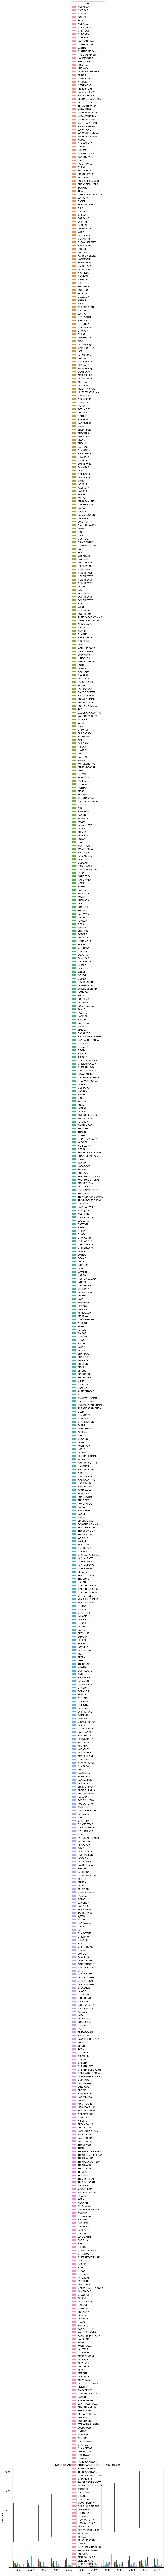

In [111]:
# Bar chart for districts appearing 3 or more than 3 years
plt.figure(figsize=(12, 8))
sns.barplot(x='YEAR', y='MaxRape', hue='DISTRICT', data=result_filtered)
plt.title('Districts Appearing 3 or More Years - Max Rapes')
plt.xlabel('Year')
plt.ylabel('Max Rapes')
plt.legend(title='District')
plt.show()

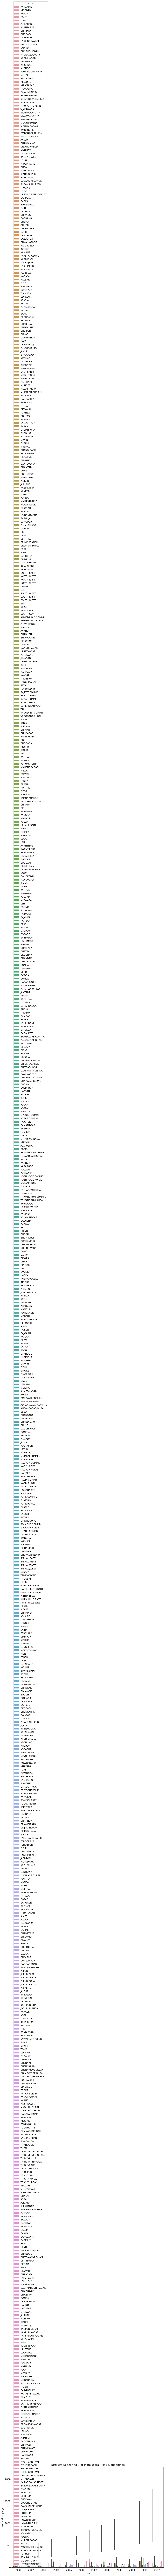

In [112]:
# Similar bar chart for Max Kidnappings
plt.figure(figsize=(12, 8))
sns.barplot(x='YEAR', y='MaxKidnappings', hue='DISTRICT', data=result_filtered)
plt.title('Districts Appearing 3 or More Years - Max Kidnappings')
plt.xlabel('Year')
plt.ylabel('Max Kidnappings')
plt.legend(title='District')
plt.show()

In [113]:
# Close the connection
conn.close()